In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1.0,1.0,1.0,0,0.0,0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,0
1,1,1,2.0,0.0,0.0,0,3.0,0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2,2,0.0,7
2,2,2,1.0,0.0,0.0,0,3.0,0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3,2,0.0,7
3,2,2,2.0,1.0,0.0,0,2.0,0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2,2,0.0,7
4,2,2,1.0,0.0,NaN,0,2.0,0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0.0,2.0,1.0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0,3,0.0,70
354,2,3,2.0,0.0,0.0,0,0.0,0,NaN,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,70
355,2,2,2.0,1.0,0.0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0,2,0.0,70
356,2,1,0.0,3.0,0.0,0,0.0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	3
float64		column 4	6
float64		column 5	6
int64		column 6	0
float64		column 7	3
int64		column 8	0
float64		column 9	6
float64		column 10	3
int64		column 11	0
int64		column 12	0
float64		column 13	6
float64		column 14	3
float64		column 15	3
float64		column 16	3
float64		column 17	3
int64		column 18	0
float64		column 19	3
float64		column 20	6
float64		column 21	3
int64		column 22	0
float64		column 23	3
int64		column 24	0
float64		column 25	6
float64		column 26	3
float64		column 27	3
float64		column 28	6
float64		column 29	6
float64		column 30	3
int64		column 31	0
int64		column 32	0
float64		column 33	9
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,355.000000,352.000000,352.000000,358.000000,355.000000,358.000000,352.000000,355.000000,...,352.000000,355.000000,355.000000,352.000000,352.000000,355.000000,358.000000,358.000000,349.000000,358.000000
mean,2.078212,1.807263,1.560563,1.355114,0.625000,0.449721,0.166197,0.379888,0.610795,0.526761,...,0.383523,0.461972,0.464789,0.943182,0.457386,0.104225,0.117318,1.877095,0.532951,36.296089
std,0.664865,0.701541,0.897970,1.130528,0.900301,0.956468,0.570445,0.837388,0.977932,0.905875,...,0.842639,0.863962,0.963031,1.123263,0.956848,0.454555,0.493863,0.699324,1.086584,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

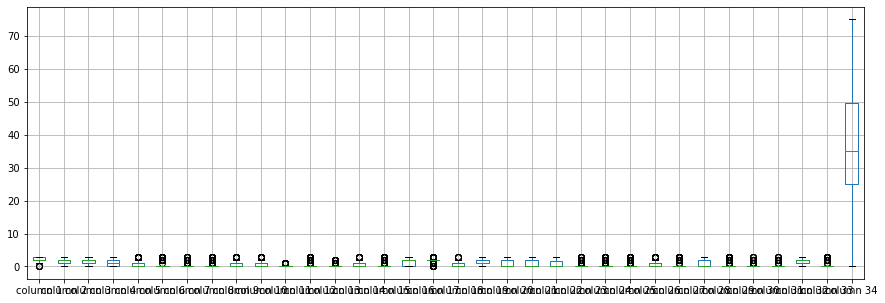

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.560563
column 4      1.355114
column 5      0.625000
column 6      0.449721
column 7      0.166197
column 8      0.379888
column 9      0.610795
column 10     0.526761
column 11     0.122905
column 12     0.410615
column 13     0.142045
column 14     0.549296
column 15     0.309859
column 16     1.369014
column 17     1.952113
column 18     0.511173
column 19     1.276056
column 20     0.653409
column 21     0.991549
column 22     0.642458
column 23     0.295775
column 24     0.368715
column 25     0.383523
column 26     0.461972
column 27     0.464789
column 28     0.943182
column 29     0.457386
column 30     0.104225
column 31     0.117318
column 32     1.877095
column 33     0.532951
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.243623,-0.022482,-0.014900,0.028225,-0.130893,-0.033391,0.138671,0.181539,...,-0.010882,0.142737,-0.000373,0.033009,0.000869,-0.000211,0.006100,0.093026,-0.029973,-0.005028
column 2,0.428769,1.000000,0.336796,-0.066691,-0.018634,-0.075013,-0.102182,-0.084815,0.273190,0.296379,...,-0.068161,0.197339,-0.112805,0.018933,-0.111374,-0.009005,-0.015402,-0.008453,-0.159140,0.016006
column 3,0.243623,0.336796,1.000000,-0.059584,0.238752,0.330279,-0.162396,0.287415,0.291663,0.248648,...,0.303152,0.340207,0.301543,-0.229025,0.278572,-0.096090,-0.130340,0.117914,0.264192,0.142848
column 4,-0.022482,-0.066691,-0.059584,1.000000,0.247140,0.402101,-0.139131,0.350632,-0.291433,-0.154985,...,0.378392,-0.195248,0.363229,0.009649,0.368863,-0.188102,-0.186868,0.055208,0.371827,0.046507
column 5,-0.014900,-0.018634,0.238752,0.247140,1.000000,0.393382,-0.168259,0.392428,-0.084339,-0.013396,...,0.427614,-0.012070,0.383175,0.014324,0.382243,-0.155207,-0.162246,0.104162,0.374806,0.086864
column 6,0.028225,-0.075013,0.330279,0.402101,0.393382,1.000000,-0.138082,0.863269,-0.273866,-0.259347,...,0.907909,-0.117133,0.911429,0.095273,0.894520,-0.107684,-0.112007,0.258753,0.903086,0.096953
column 7,-0.130893,-0.102182,-0.162396,-0.139131,-0.168259,-0.138082,1.000000,-0.133219,0.210700,-0.019325,...,-0.115226,-0.156523,-0.142405,-0.026176,-0.141705,0.783995,0.845569,-0.113358,-0.131009,-0.361758
column 8,-0.033391,-0.084815,0.287415,0.350632,0.392428,0.863269,-0.133219,1.000000,-0.281429,-0.265889,...,0.893672,-0.104403,0.886030,0.135234,0.872144,-0.103939,-0.108070,0.276068,0.884897,0.111047
column 9,0.138671,0.273190,0.291663,-0.291433,-0.084339,-0.273866,0.210700,-0.281429,1.000000,0.650187,...,-0.265173,0.494331,-0.284414,-0.416497,-0.280234,0.232425,0.254330,-0.064057,-0.265163,-0.092226
column 10,0.181539,0.296379,0.248648,-0.154985,-0.013396,-0.259347,-0.019325,-0.265889,0.650187,1.000000,...,-0.258670,0.456491,-0.259878,-0.422337,-0.262672,-0.051884,-0.019647,0.022855,-0.249501,0.057479


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+11,34+11+11,34+11+11+11,34+11+11+11+11,34+11+11+11+11+11,34+11+11+11+11+11+11,34+11+11+11+11+11+11+11,34+11+11+11+11+11+11,34+11+11+11+11+11,34+11+11+11+11,34+11+11+11,34+11+11,34+11,34], vae_layer = False, seed = 11)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.6364917755127
Epoch: 1 , loss: 75.89433878118342
Epoch: 2 , loss: 76.37670863758434
Epoch: 3 , loss: 75.79951164939187
Epoch: 4 , loss: 75.65280359441584
Epoch: 5 , loss: 75.70796689120206
Epoch: 6 , loss: 75.98785747181286
Epoch: 7 , loss: 75.4724076010964
Epoch: 8 , loss: 75.52886685458097
Epoch: 9 , loss: 75.06496845592152
Epoch: 10 , loss: 74.01444868607955
Epoch: 11 , loss: 71.59201500632547
Epoch: 12 , loss: 69.27961522882634
Epoch: 13 , loss: 68.18903281471945
Epoch: 14 , loss: 67.52487876198508
Epoch: 15 , loss: 67.03294129805131
Epoch: 16 , loss: 66.66163930025968
Epoch: 17 , loss: 66.13582888516513
Epoch: 18 , loss: 66.08857484297319
Epoch: 19 , loss: 65.91327095031738
Epoch: 20 , loss: 65.7261699329723
Epoch: 21 , loss: 65.45432940396395
Epoch: 22 , loss: 65.11513259194113
Epoch: 23 , loss: 65.38004701787776
Epoch: 24 , loss: 65.14626502990723
Epoch: 25 , loss: 65.28171608664773
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
1,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
2,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
3,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
4,0,0,0.0,0.0,0.360853,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,-2.558006,0.0,0.0,0,0,0.000000,0
354,0,0,0.0,0.0,0.000000,0,0.0,0,-2.562597,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
355,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0
356,0,0,0.0,0.0,0.000000,0,0.0,0,0.000000,0.208496,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(14.622661480860852, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.019289263761318926

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1.0,1.0,1.000000,0,0.0,0,2.000000,2.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,2.000000,0
1,1,1,2.0,0.0,0.000000,0,3.0,0,3.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,2.0,2,2,0.000000,7
2,2,2,1.0,0.0,0.000000,0,3.0,0,2.000000,0.000000,...,0.0,0.0,0.0,2.000000,0.0,3.0,3,2,0.000000,7
3,2,2,2.0,1.0,0.000000,0,2.0,0,2.000000,2.000000,...,0.0,0.0,0.0,2.000000,0.0,2.0,2,2,0.000000,7
4,2,2,1.0,0.0,0.360853,0,2.0,0,2.000000,0.000000,...,0.0,0.0,0.0,3.000000,0.0,2.0,2,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0.0,2.0,1.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.441994,0.0,0.0,0,3,0.000000,70
354,2,3,2.0,0.0,0.000000,0,0.0,0,0.437403,2.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0.000000,70
355,2,2,2.0,1.0,0.000000,0,0.0,0,0.000000,0.000000,...,0.0,0.0,0.0,2.000000,0.0,0.0,0,2,0.000000,70
356,2,1,0.0,3.0,0.000000,0,0.0,0,0.000000,0.208496,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0.000000,70


In [20]:
imputations[-1].to_excel("DERM_NG_1(imp).xlsx", index=False, header=False)